# Esercizi su Data Description and Visualization

## Esercizio 1

Considerando il dataset del Titanic, mostra i grafici a barre delle frequenze assolute e relative dei valori presenti nella colonna **Pclass**.
Scegliendo casualmente un passeggero, qual è la probabilità che egli sia imbarcato in **seconda classe**?


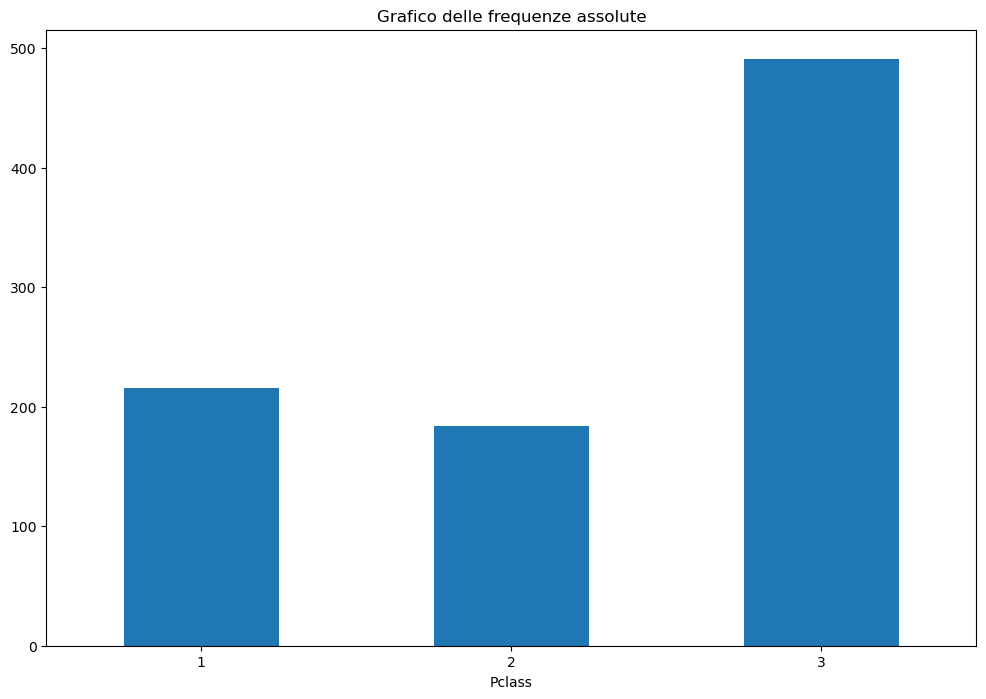

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv', index_col='PassengerId')

# Frequenza assoluta

titanic['Pclass'].value_counts().sort_index().plot.bar(figsize=(12,8))
plt.title("Grafico delle frequenze assolute")
plt.xticks(rotation=0)
plt.show()

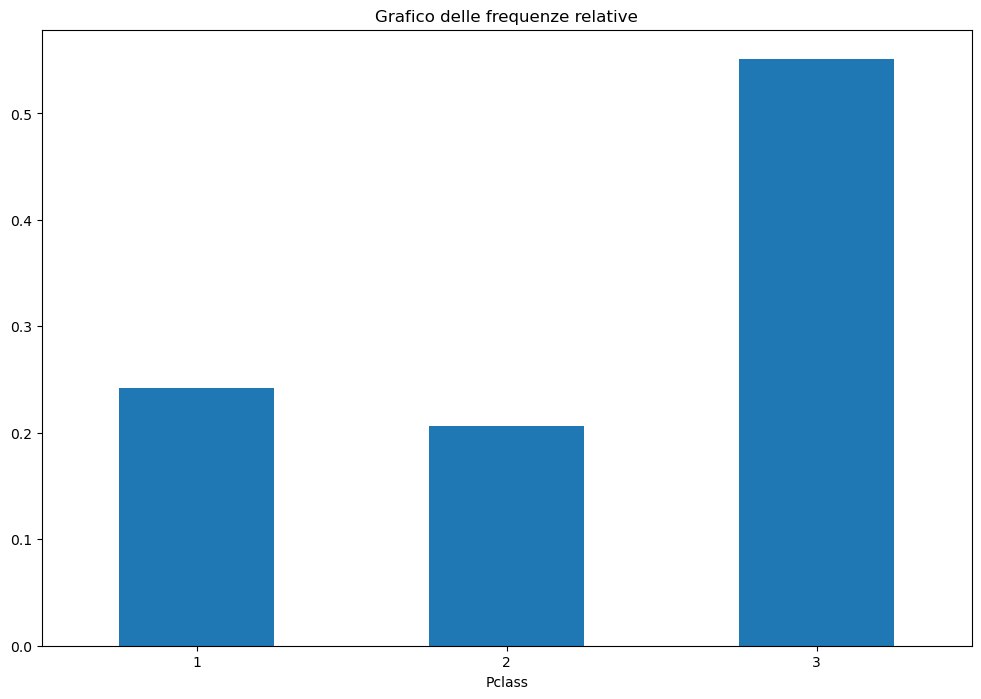

In [149]:
# Frequenza relativa

titanic['Pclass'].value_counts(normalize=True).sort_index().plot.bar(figsize=(12,8))
plt.title("Grafico delle frequenze relative")
plt.xticks(rotation=0)
plt.show()

In [150]:
# Probabilità che un passeggero preso a caso appartenga alla seconda classe

prob = titanic['Pclass'].value_counts(normalize=True).sort_index()[2]

print(f"Probabilità che una persona a caso appartenga alla classe 2: {prob*100:.2f}%")

Probabilità che una persona a caso appartenga alla classe 2: 20.65%


## Esercizio 2

Considerando il dataset del Titanic, mostra l’istogramma delle età dei passeggeri imbarcati in prima classe.
Utilizza un criterio appropriato per scegliere il numero di intervalli (bins).

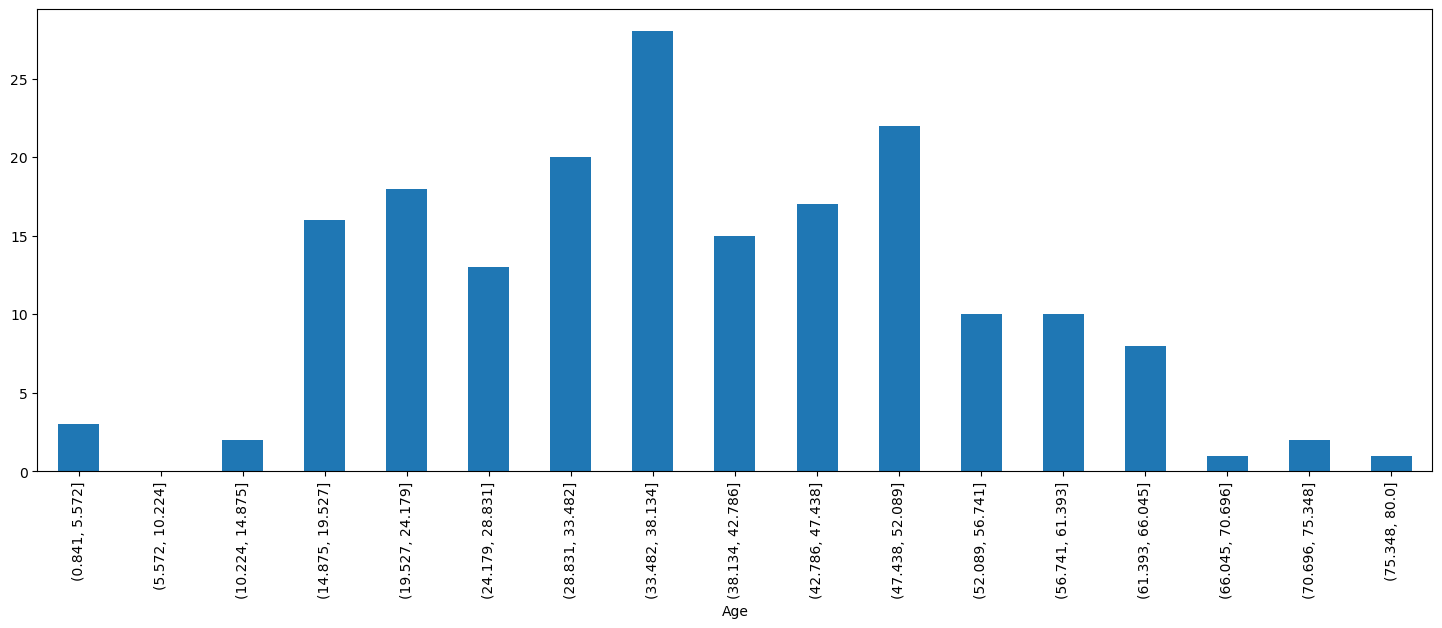

In [151]:
passeggeriPrimaClasse = titanic[titanic['Pclass']==1]['Age']

# Utilizziamo Struges

struges = int(3.3 * np.log(len(passeggeriPrimaClasse)))

passeggeri_quantized = pd.cut(passeggeriPrimaClasse,bins=struges)

passeggeri_quantized.value_counts().sort_index().plot.bar(figsize=(18,6))
plt.show()


## Esercizio 3

Se scelgo casualmente un passeggero imbarcato in prima classe, qual è la probabilità che la sua età sia compresa tra 20 e 30 anni?

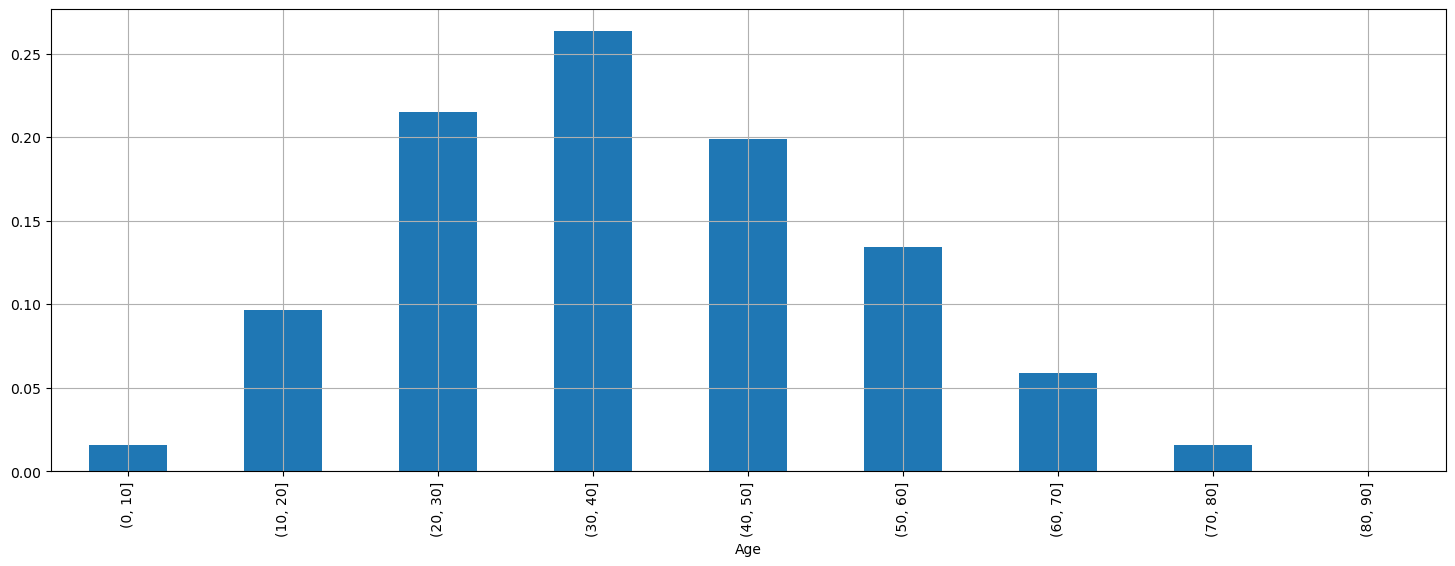

Probabilità che il passeggero sia tra i 20 ed i 30 anni 0.22


In [152]:
passeggeri_quantized = pd.cut(passeggeriPrimaClasse,bins=[0,10,20,30,40,50,60,70,80,90])

passeggeri_quantized.value_counts(normalize=True).sort_index().plot.bar(figsize=(18,6))
plt.grid()
plt.show()

prob = passeggeri_quantized.value_counts(normalize=True).sort_index().iloc[2]
print(f"Probabilità che il passeggero sia tra i 20 ed i 30 anni {prob:.2f}") 

# Esercizio 4

Considerando il set di dati del Titanic, confrontare le distribuzioni cumulative per età dei passeggeri imbarcati nelle varie classi. Le distribuzioni sono simili? In quale classe sono iscritti i soggetti più giovani?

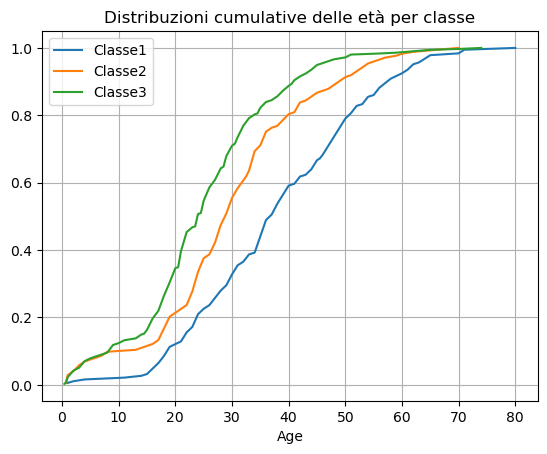

Andamento delle distribuzioni simile
Le persone più giovani appartengono alla terza classe


In [153]:
classe1 = titanic[titanic['Pclass']==1]['Age'].value_counts(normalize=True).sort_index().cumsum().plot()
classe2 = titanic[titanic['Pclass']==2]['Age'].value_counts(normalize=True).sort_index().cumsum().plot()
classe3 = titanic[titanic['Pclass']==3]['Age'].value_counts(normalize=True).sort_index().cumsum().plot()

plt.title("Distribuzioni cumulative delle età per classe")
plt.legend(["Classe1","Classe2","Classe3"])
plt.grid()
plt.show()

print("Andamento delle distribuzioni simile")
print("Le persone più giovani appartengono alla terza classe")

# Esercizio 5

Considerando il set di dati del Titanic, mostrare un grafico a barre impilate con le percentuali di passeggeri appartenenti alle tre classi separatamente per i due sessi. Ci sono differenze nella distribuzione?

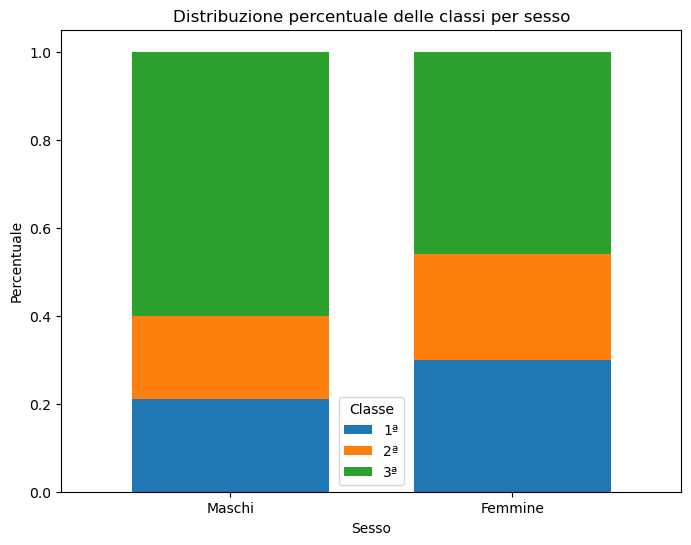

In [154]:
classeM = titanic[titanic['Sex'] == "male"]
classeF = titanic[titanic['Sex'] == "female"]


sex_m = classeM["Pclass"].value_counts(normalize=True).sort_index()
sex_f = classeF["Pclass"].value_counts(normalize=True).sort_index()


df = pd.DataFrame({
    'Maschi': sex_m,
    'Femmine': sex_f
})


df = df.T


df.plot(kind='bar', stacked=True, figsize=(8,6), width=0.7)
plt.title('Distribuzione percentuale delle classi per sesso')
plt.xlabel('Sesso')
plt.ylabel('Percentuale')
plt.xticks(rotation=0)
plt.legend(title='Classe', labels=['1ª', '2ª', '3ª'])
plt.show()

# Esercizio 6

Considerando il set di dati del Titanic, calcola per ciascuna variabile il conteggio, la media, la deviazione standard, il minimo, il massimo, la mediana, il primo quartile e il terzo quartile. Dopo aver calcolato singolarmente i valori richiesti, utilizzare il metodo describe per ottenere tali valori. Quale variabile è la più dispersa?

In [155]:
numeric_cols = titanic.select_dtypes(include=["int64", "float64"]).columns

# Calcolo manuale delle statistiche
for col in numeric_cols:
    print(f"\nColonna: {col}")
    print(f"Conteggio = {titanic[col].count()}")
    print(f"Media = {titanic[col].mean():.2f}")
    print(f"Deviazione standard = {titanic[col].std():.2f}")
    print(f"Minimo = {titanic[col].min()}")
    print(f"Massimo = {titanic[col].max()}")
    print(f"Mediana = {titanic[col].median()}")
    print(f"Primo quartile (Q1) = {titanic[col].quantile(0.25)}")
    print(f"Terzo quartile (Q3) = {titanic[col].quantile(0.75)}")

# Confronto con describe()
print("\n===============================")
print("Risultato con describe()")
print("===============================\n")
print(titanic[numeric_cols].describe())

# Calcolo della dispersione relativa
dispersione = (titanic[numeric_cols].std() / titanic[numeric_cols].mean()).abs()
print("\n===============================")
print("Coefficiente di variazione (CV)")
print("===============================\n")
print(dispersione.sort_values(ascending=False))

print("\n📈 La variabile più dispersa è 'Fare'.")


Colonna: Survived
Conteggio = 891
Media = 0.38
Deviazione standard = 0.49
Minimo = 0
Massimo = 1
Mediana = 0.0
Primo quartile (Q1) = 0.0
Terzo quartile (Q3) = 1.0

Colonna: Pclass
Conteggio = 891
Media = 2.31
Deviazione standard = 0.84
Minimo = 1
Massimo = 3
Mediana = 3.0
Primo quartile (Q1) = 2.0
Terzo quartile (Q3) = 3.0

Colonna: Age
Conteggio = 714
Media = 29.70
Deviazione standard = 14.53
Minimo = 0.42
Massimo = 80.0
Mediana = 28.0
Primo quartile (Q1) = 20.125
Terzo quartile (Q3) = 38.0

Colonna: SibSp
Conteggio = 891
Media = 0.52
Deviazione standard = 1.10
Minimo = 0
Massimo = 8
Mediana = 0.0
Primo quartile (Q1) = 0.0
Terzo quartile (Q3) = 1.0

Colonna: Parch
Conteggio = 891
Media = 0.38
Deviazione standard = 0.81
Minimo = 0
Massimo = 6
Mediana = 0.0
Primo quartile (Q1) = 0.0
Terzo quartile (Q3) = 0.0

Colonna: Fare
Conteggio = 891
Media = 32.20
Deviazione standard = 49.69
Minimo = 0.0
Massimo = 512.3292
Mediana = 14.4542
Primo quartile (Q1) = 7.9104
Terzo quartile (Q3) = 31.0



# Esercizio 7

Considerando il set di dati del Titanic, per ciascuna delle tre classi, calcolare la media e la varianza dell'età dei passeggeri. In quale classe sono meno disperse le età? Quale classe contiene gli individui più giovani? Completa l'analisi con grafici a barre.

Media età passeggeri classe 1: 38.23, Deviazione Standard classe 1: 14.80
Media età passeggeri classe 2: 29.88, Deviazione Standard classe 2: 14.00
Media età passeggeri classe 3: 25.14, Deviazione Standard classe 3: 12.50
La classe che ha maggiore dispersione è quella con deviazione standard maggiore ed è quindi la classe 1
La classe che contiene gli individui più giovani è la classe 3


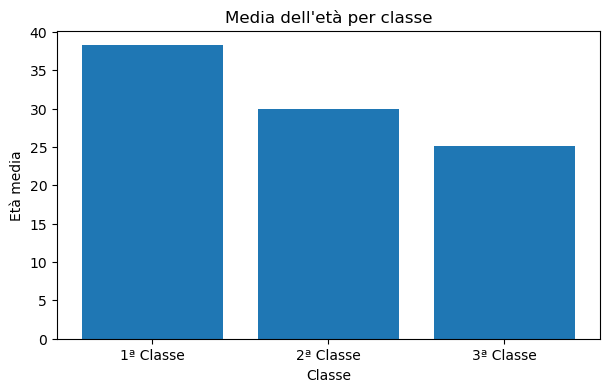

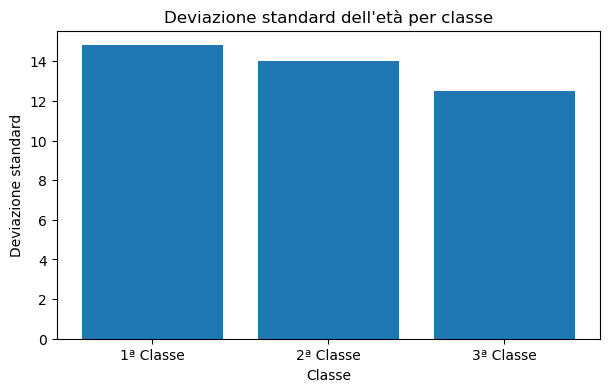

In [159]:
classe1 = titanic[titanic['Pclass']==1]['Age']
classe2 = titanic[titanic['Pclass']==2]['Age']
classe3 = titanic[titanic['Pclass']==3]['Age']

print(f"Media età passeggeri classe 1: {classe1.mean():.2f}, Deviazione Standard classe 1: {classe1.std():.2f}")
print(f"Media età passeggeri classe 2: {classe2.mean():.2f}, Deviazione Standard classe 2: {classe2.std():.2f}")
print(f"Media età passeggeri classe 3: {classe3.mean():.2f}, Deviazione Standard classe 3: {classe3.std():.2f}")

print("La classe che ha maggiore dispersione è quella con deviazione standard maggiore ed è quindi la classe 1")
print("La classe che contiene gli individui più giovani è la classe 3")

plt.figure(figsize=(7,4))
plt.bar(['1ª Classe','2ª Classe','3ª Classe'],
        [classe1.mean(), classe2.mean(), classe3.mean()])
plt.title("Media dell'età per classe")
plt.xlabel("Classe")
plt.ylabel("Età media")
plt.show()

plt.figure(figsize=(7,4))
plt.bar(['1ª Classe','2ª Classe','3ª Classe'],
        [classe1.std(), classe2.std(), classe3.std()])
plt.title("Deviazione standard dell'età per classe")
plt.xlabel("Classe")
plt.ylabel("Deviazione standard")
plt.show()
